In [ ]:

import tensorflow as tf

print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")


GPU disponible: []
Entorno configurado correctamente en Google Colab


In [ ]:
#Cargar dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df["target"] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#Preprocesamiento - Separar variables predictoras y target
X = df.drop("target", axis=1)
y = df["target"]
#Dividir en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
#Escalado de características
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Entrenar modelo
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)

# Predecir
y_pred_lr = lr.predict(X_test_scaled)

# Métricas
acc = accuracy_score(y_test, y_pred_lr)
print("Accuracy Logistic Regression:", acc)

# Reporte como diccionario
report_dict = classification_report(y_test, y_pred_lr, output_dict=True)
for clase in report_dict:
    if clase not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report_dict[clase]['precision']
        recall = report_dict[clase]['recall']
        f1 = report_dict[clase]['f1-score']
        support = report_dict[clase]['support']
        print(f"- Clase {clase}: precisión {precision:.2f}, recall {recall:.2f}, F1 {f1:.2f}, soporte {support}")

# Interpretación general
print("\nInterpretación:")
if acc > 0.9:
    print("El modelo tiene un desempeño excelente, prediciendo correctamente la mayoría de las muestras.")
elif acc > 0.75:
    print("El modelo tiene un desempeño bueno, pero podría mejorar en algunas clases.")
else:
    print("El modelo tiene un desempeño moderado o bajo, se recomienda ajustar parámetros o probar otro modelo.")


Accuracy Logistic Regression: 0.9814814814814815
- Clase 0: precisión 0.95, recall 1.00, F1 0.97, soporte 18.0
- Clase 1: precisión 1.00, recall 0.95, F1 0.98, soporte 21.0
- Clase 2: precisión 1.00, recall 1.00, F1 1.00, soporte 15.0

Interpretación:
El modelo tiene un desempeño excelente, prediciendo correctamente la mayoría de las muestras.


In [ ]:
#KNN K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Entrenar modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predecir
y_pred_knn = knn.predict(X_test_scaled)

# Accuracy
acc_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy KNN:", acc_knn)

# Reporte por clase
report_dict = classification_report(y_test, y_pred_knn, output_dict=True)
for clase in report_dict:
    if clase not in ['accuracy', 'macro avg', 'weighted avg']:
        precision = report_dict[clase]['precision']
        recall = report_dict[clase]['recall']
        f1 = report_dict[clase]['f1-score']
        support = report_dict[clase]['support']
        print(f"- Clase {clase}: precisión {precision:.2f}, recall {recall:.2f}, F1 {f1:.2f}, soporte {support}")

# Interpretación general
print("\nInterpretación:")
if acc_knn > 0.9:
    print("El modelo KNN tiene un desempeño excelente, clasificando correctamente la mayoría de las muestras.")
elif acc_knn > 0.75:
    print("El modelo KNN tiene un desempeño bueno, aunque podría mejorar en algunas clases.")
else:
    print("El modelo KNN tiene un desempeño moderado o bajo, se recomienda ajustar parámetros o probar otro modelo.")

Accuracy KNN: 0.9444444444444444
- Clase 0: precisión 1.00, recall 1.00, F1 1.00, soporte 18.0
- Clase 1: precisión 1.00, recall 0.86, F1 0.92, soporte 21.0
- Clase 2: precisión 0.83, recall 1.00, F1 0.91, soporte 15.0

Interpretación:
El modelo KNN tiene un desempeño excelente, clasificando correctamente la mayoría de las muestras.


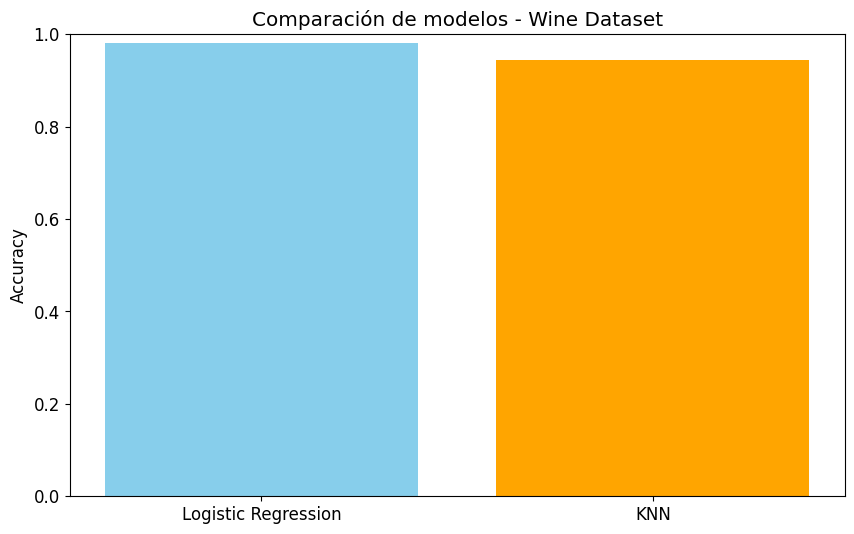

Interpretación:
- Logistic Regression: Accuracy = 0.98
- KNN: Accuracy = 0.94

Recomendación:
El modelo Logistic Regression tiene un desempeño excelente y es recomendable para su uso.


In [ ]:
#Comparacion modelos de Regresión lineal y KNN K-Nearest Neighbors
results = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "KNN": accuracy_score(y_test, y_pred_knn)
}

import matplotlib.pyplot as plt

# Gráfico de barras
plt.bar(results.keys(), results.values(), color=["skyblue", "orange"])
plt.ylabel("Accuracy")
plt.title("Comparación de modelos - Wine Dataset")
plt.ylim(0, 1)
plt.show()

# Interpretación y recomendación
best_model = max(results, key=results.get)
best_acc = results[best_model]

print("Interpretación:")
for model, acc in results.items():
    print(f"- {model}: Accuracy = {acc:.2f}")

print("\nRecomendación:")
if best_acc > 0.9:
    print(f"El modelo {best_model} tiene un desempeño excelente y es recomendable para su uso.")
elif best_acc > 0.75:
    print(f"El modelo {best_model} tiene un desempeño bueno; se puede usar pero se puede intentar mejorar con ajuste de parámetros.")
else:
    print(f"Ningún modelo alcanza un desempeño alto; se recomienda ajustar parámetros, probar otros modelos o más datos de entrenamiento.")